In [1]:
# Install necessary packages

%pip install tensorflow_io
%pip install deeplake
%pip install deeplake[audio]
%pip install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 39.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.9/475.9 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
import librosa
import deeplake

# Preprocessing

In [ ]:
ds = deeplake.load("hub://activeloop/gtzan-genre")

\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtzan-genre



-

hub://activeloop/gtzan-genre loaded successfully.



[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

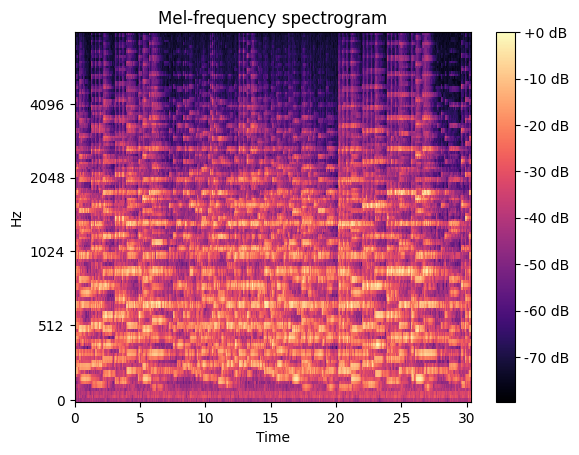

In [ ]:
#Mel-frequency spectrogram example

sr = 22050
test_song = ds['audio'][201]
#print(test_song.shape)
test_song = tf.squeeze(test_song, axis=[-1])

S = librosa.feature.melspectrogram(y=test_song.numpy(), sr=sr, n_mels=128,
                                    fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
# chunk = 33000 # 1.5 second, with 0.5 second overlap

# def splitsongs(X, overlap = 0.5):
#     # Empty lists to hold our results
#     temp_X = []

#     # Get the input song array size
#     xshape = X.shape[0]
#     offset = int(chunk*(1.-overlap))
    
#     # Split the song and create new ones on windows
#     spsong = [X[i:i+chunk] for i in range(0, xshape - chunk + offset, offset)]
#     for s in spsong:
#         if s.shape[0] != chunk:
#             continue

#         temp_X.append(s)

#     return np.array(temp_X)

# split_songs = []
# for i in ds['audio']:
#   x = splitsongs(i.numpy())
#   split_songs.append(x)
# x.shape

(39, 33000, 1)

In [ ]:
# import pickle
# sr = 22050
# specs= np.zeros((1000, 128, 1293))
# for i in range(len(ds['audio'])):
#     print("\r Loading... {}".format(i), end="")
#     song = tf.squeeze(ds['audio'][i], axis=[-1]).numpy()
#     song = librosa.feature.melspectrogram(y=song, sr=sr, n_mels=128,
#                                       fmax=8000)
#     song = librosa.power_to_db(song, ref= np.max)

#     song = np.array(song)
#     song = np.resize(song, (128, 1293)) # necessary because some songs are like 0.1 second longer than anticipated

#     specs[i] = song

# filepath1 = '/content/drive/MyDrive/DL Project/data/specs.pkl'
# filepath2 = '/content/drive/MyDrive/DL Project/data/genres.pkl'

# with open(filepath1, "wb")as file:
#   pickle.dump(specs, file)
#   file.close()

# with open(filepath2, "wb") as file:
#   pickle.dump(ds['genre'], file)
#   file.close()

#Transformer Architecture

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
import librosa
import deeplake

In [5]:
#load data
import pickle

with open('/content/drive/MyDrive/DL Project/data/specs.pkl', 'rb') as f:
    data = pickle.load(f)

with open('/content/drive/MyDrive/DL Project/data/genres.pkl', 'rb') as f:
    genres = pickle.load(f)

genres = genres.numpy()


In [6]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

train_idx, test_idx = train_test_split(range(1000), test_size=0.2, shuffle=True, random_state=1)

train_data, train_labels = data[train_idx], genres[train_idx]
test_data, test_labels = data[test_idx], genres[test_idx]

# add "color" channel
train_data = tf.expand_dims(train_data, axis = -1)
test_data = tf.expand_dims(test_data, axis = -1)

train_data[1].shape

TensorShape([128, 1293, 1])

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 12
image_height = 128
image_width = 1293
patch_size = 40  
num_patches = ((image_width-(patch_size))//(patch_size) +1) #((image_width-(patch_size))//(patch_size//2) +1)   #strides = [1, self.patch_size, self.patch_size//2,1] (with overlap)
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2, 
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 3 # can up this later
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

num_classes = 10
input_shape = (128, 1293, 3)   #changed from (128,1293,1)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [30]:
# use a Sequential to normalize the data
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(train_data)

In [8]:
# Model Arch

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation= 'relu')(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, images.shape[1], self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1], #[1, self.patch_size, self.patch_size//2, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

def positional_encoding(length, depth):
    depth = depth/2
    ## Generate a range of positions and depths 
    positions = np.arange(length)[:, np.newaxis]    # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth  # (1, depth)
    ## Compute range of radians to take the sine and cosine of.
    angle_rates = 1 / (10000**depths)               # (1, depth)
    angle_rads = positions * angle_rates            # (pos, depth)
    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 
    ## This serves as offset for the Positional Encoding
    return tf.cast(pos_encoding, dtype=tf.float32)

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        # self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

        self.position_embedding = positional_encoding(num_patches,projection_dim)
        self.projection_dim = projection_dim

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        # encoded = self.projection(patch) + self.position_embedding(positions)
        encoded = self.projection(patch) + self.position_embedding

        # length = tf.shape(patch)[1]
        # encoded = self.projection(patch)
        # encoded *= tf.math.sqrt(tf.cast(self.projection_dim, tf.float32))
        # encoded += self.position_embedding[tf.newaxis, :length, :]
        return encoded
    
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # # Augment data.
    #augmented = data_augmentation(inputs)
    #augmented = tf.image.grayscale_to_rgb(augmented, name=None)
    # Create and encode patches.
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    # encoded_patches = tf.keras.layers.Conv1D(1,patch_size, strides=patch_size)(augmented)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization()(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.25
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization()(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.25)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    print(encoded_patches.shape)
    representation = layers.LayerNormalization()(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.1)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.25)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

(1, 128, 128, 1)
Image size: 128 X 1293
Patch size: 128 X 32
Patches per image: 4
Elements per patch: 4096


<ipython-input-9-eb701cec2905>:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, n+1, i+1)


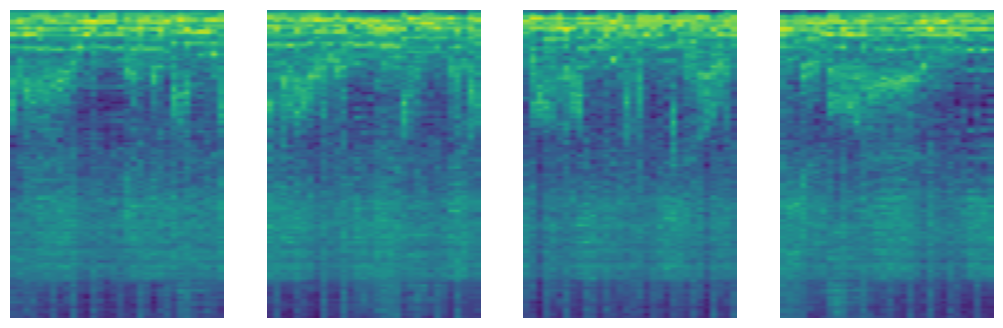

In [9]:
#visualize patches
import matplotlib.pyplot as plt

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, images.shape[1], self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size,1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

patch_size=32
image = test_data[15][:,:image_height*4]
plt.figure(figsize=(16,4))
vmin=np.min(image)
vmax=np.max(image)
plt.imshow(image,vmin=vmin, vmax=vmax)
plt.axis("off")
plt.savefig('/content/drive/MyDrive/DL Project/images/metal.png')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_height, image_height)
)
print(resized_image.shape)
patches =  Patches(32)(resized_image)
print(f"Image size: {image_height} X {image_width}")
print(f"Patch size: {image_height} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = patches.shape[1]
for i in range(image_height//32):
    patch=patches[0][i]
    ax = plt.subplot(1, n+1, i+1)
    patch_img = tf.reshape(patch, (image_height, patch_size))
    plt.imshow(patch_img.numpy(),vmin=vmin,vmax=vmax, aspect='auto')
    plt.axis("off")
plt.savefig('/content/drive/MyDrive/DL Project/images/patches.png')

In [39]:
optimizer = tf.optimizers.Adam(
        learning_rate=learning_rate
    )

model = create_vit_classifier()

model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

model.summary()

(None, 32, 64)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 1293,   0           []                               
                                3)]                                                               
                                                                                                  
 patches_9 (Patches)            (None, None, 15360)  0           ['input_3[0][0]']                
                                                                                                  
 patch_encoder_2 (PatchEncoder)  (None, 32, 64)      983104      ['patches_9[0][0]']              
                                                                                                  
 layer_normalization_14 (LayerN  (None, 32, 64)      128         ['patch_enco

In [34]:
#convert to 3 channels for interpretability methods
train_data = data_augmentation(train_data)
test_data = data_augmentation(test_data)

train_data=tf.image.grayscale_to_rgb(train_data)
test_data=tf.image.grayscale_to_rgb(test_data)


In [40]:
## This trains the model

def run_experiment(model):
    optimizer = tf.optimizers.Adam(
        learning_rate=learning_rate
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=train_data,
        y=train_labels,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(test_data, test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

(None, 32, 64)
Epoch 1/20
23/23 [==============================] - 20s 425ms/step - loss: 3.1708 - accuracy: 0.1903 - top-5-accuracy: 0.6486 - val_loss: 2.1827 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.7875
Epoch 2/20
23/23 [==============================] - 10s 428ms/step - loss: 2.0538 - accuracy: 0.2847 - top-5-accuracy: 0.7667 - val_loss: 1.7635 - val_accuracy: 0.3750 - val_top-5-accuracy: 0.8625
Epoch 3/20
23/23 [==============================] - 9s 413ms/step - loss: 1.8667 - accuracy: 0.3278 - top-5-accuracy: 0.8361 - val_loss: 1.8641 - val_accuracy: 0.3000 - val_top-5-accuracy: 0.8125
Epoch 4/20
23/23 [==============================] - 10s 429ms/step - loss: 1.8438 - accuracy: 0.3347 - top-5-accuracy: 0.8139 - val_loss: 1.7353 - val_accuracy: 0.4250 - val_top-5-accuracy: 0.8500
Epoch 5/20
23/23 [==============================] - 9s 385ms/step - loss: 1.6904 - accuracy: 0.3903 - top-5-accuracy: 0.8639 - val_loss: 1.6073 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.8625
Ep

In [36]:
tf.keras.models.save_model(vit_classifier, "/content/drive/MyDrive/DL Project/data/temp")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/DL Project/data/")

In [ ]:
loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 1293,   0           []                               
                                1)]                                                               
                                                                                                  
 data_augmentation (Sequential)  (None, 128, 1293, 1  3          ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 tf.image.grayscale_to_rgb_1 (T  (None, 128, 1293, 3  0          ['data_augmentation[0][0]']      
 FOpLambda)                     )                                                           

7/7 [==============================] - 3s 362ms/step


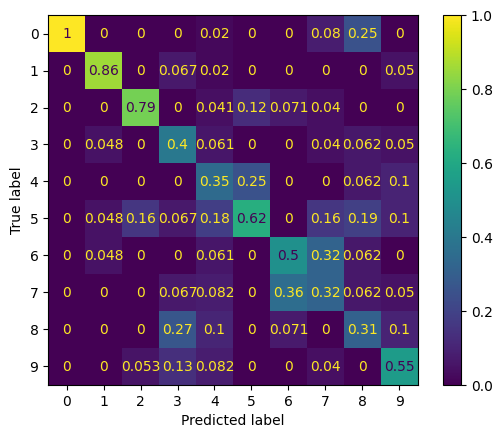

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = np.argmax(loaded_model.predict(test_data),axis=1)


ConfusionMatrixDisplay.from_predictions(test_labels, y_pred, normalize='true')
plt.savefig('/content/drive/MyDrive/DL Project/images/confusion_matrix.png')
plt.show()